# Requirements

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

## Introduction
The analysis of Spotify songs, characterized by a rich set of features such as danceability, energy, and valence, holds significant importance in the realm of music research, entertainment, and data-driven decision-making. Understanding the musical attributes of songs through data analysis provides valuable insights into user preferences, genre trends, and the overall landscape of the music industry. This type of analysis contributes to personalized recommendations for users, enhancing their music discovery experience. Moreover, it aids music producers and artists in tailoring their creations to align with popular trends and audience preferences. Additionally, the exploration of Spotify song data has the potential to uncover patterns, correlations, and anomalies that can inform marketing strategies, playlist curation, and even influence the strategic planning of music events. Overall, the analysis of Spotify songs is instrumental in leveraging data to enhance user experiences, guide artistic endeavors, and inform strategic decisions within the dynamic and ever-evolving music industry.

## The Spotify Songs Dataset

## Downloading the Spotify Songs Dataset

In [ ]:
!gdown 1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_

Downloading...
From: https://drive.google.com/uc?id=1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_
To: /content/spotify-songs.csv
100% 1.82M/1.82M [00:00<00:00, 161MB/s]


## Exploring the Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Loading the dataset into a `pandas` data frame.

In [ ]:
df = pd.read_csv('spotify-songs.csv')

In [ ]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB


Check if the dataset is balanced.

In [ ]:
df['genre'].value_counts()

,count
genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


<ipython-input-7-eb097e7b3f37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='Greens')  # Green colormap


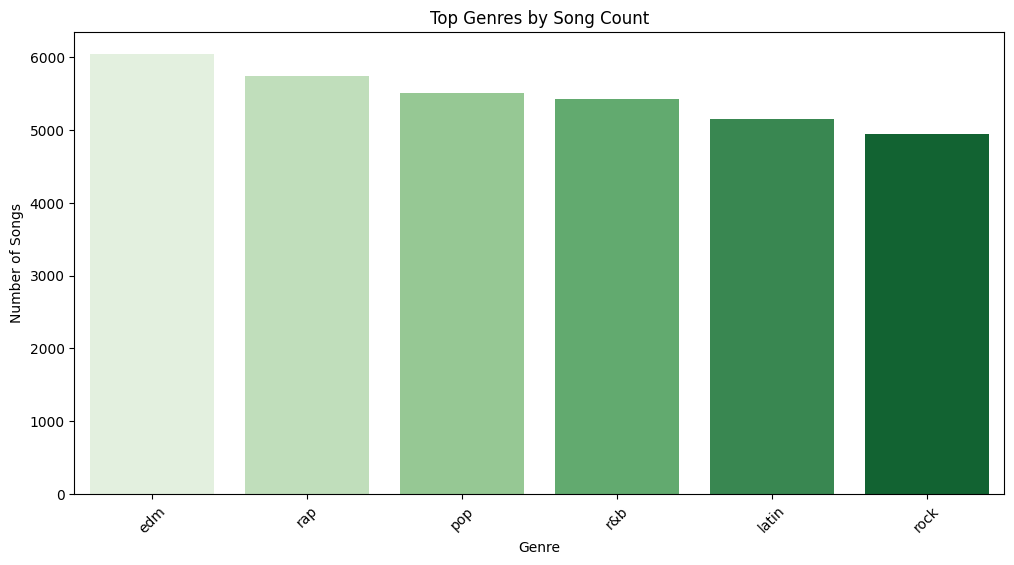

In [ ]:
if 'genre' in df.columns:
    top_genres = df['genre'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_genres.index, y=top_genres.values, palette='Greens')  # Green colormap
    plt.xticks(rotation=45)
    plt.title('Top Genres by Song Count')
    plt.xlabel('Genre')
    plt.ylabel('Number of Songs')
    plt.show()

Encoding the target variable using the `LabelEncoder` from the `scikit-learn` library.



In [ ]:
genre_encoding={
    "edm": 0,
    "rap": 1,
    "pop": 2,
    "r&b": 3,
    "latin": 4,
    "rock": 5,
}

In [ ]:
def encode_genre(genre):
  return genre_encoding[genre]

In [ ]:
df['genre']=df['genre'].apply(encode_genre)

In [ ]:
df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,2
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,2
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,2
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,0
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0


## Correlation Heatmap

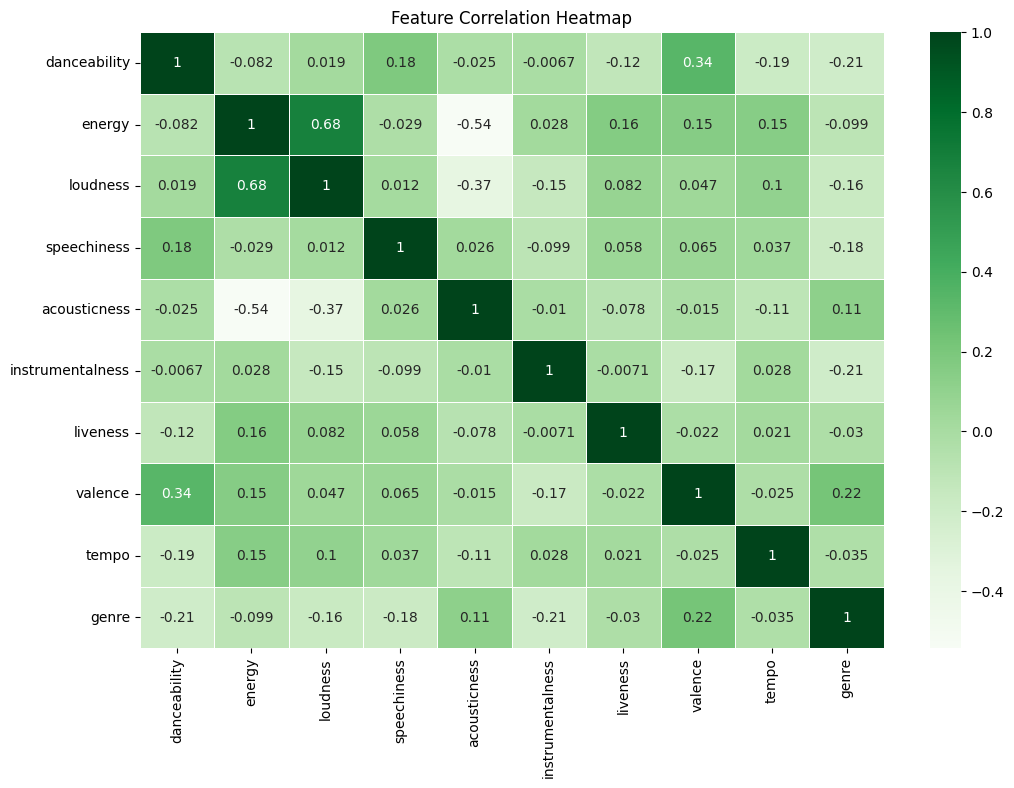

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

This correlation Heatmap indicates that there are no strong linear relationships between features.
Values ​​range between -1 and 1, with values ​​closer to -1 or 1 indicating a strong negative or positive correlation, respectively, and values ​​closer to 0 indicating little or no linear correlation.

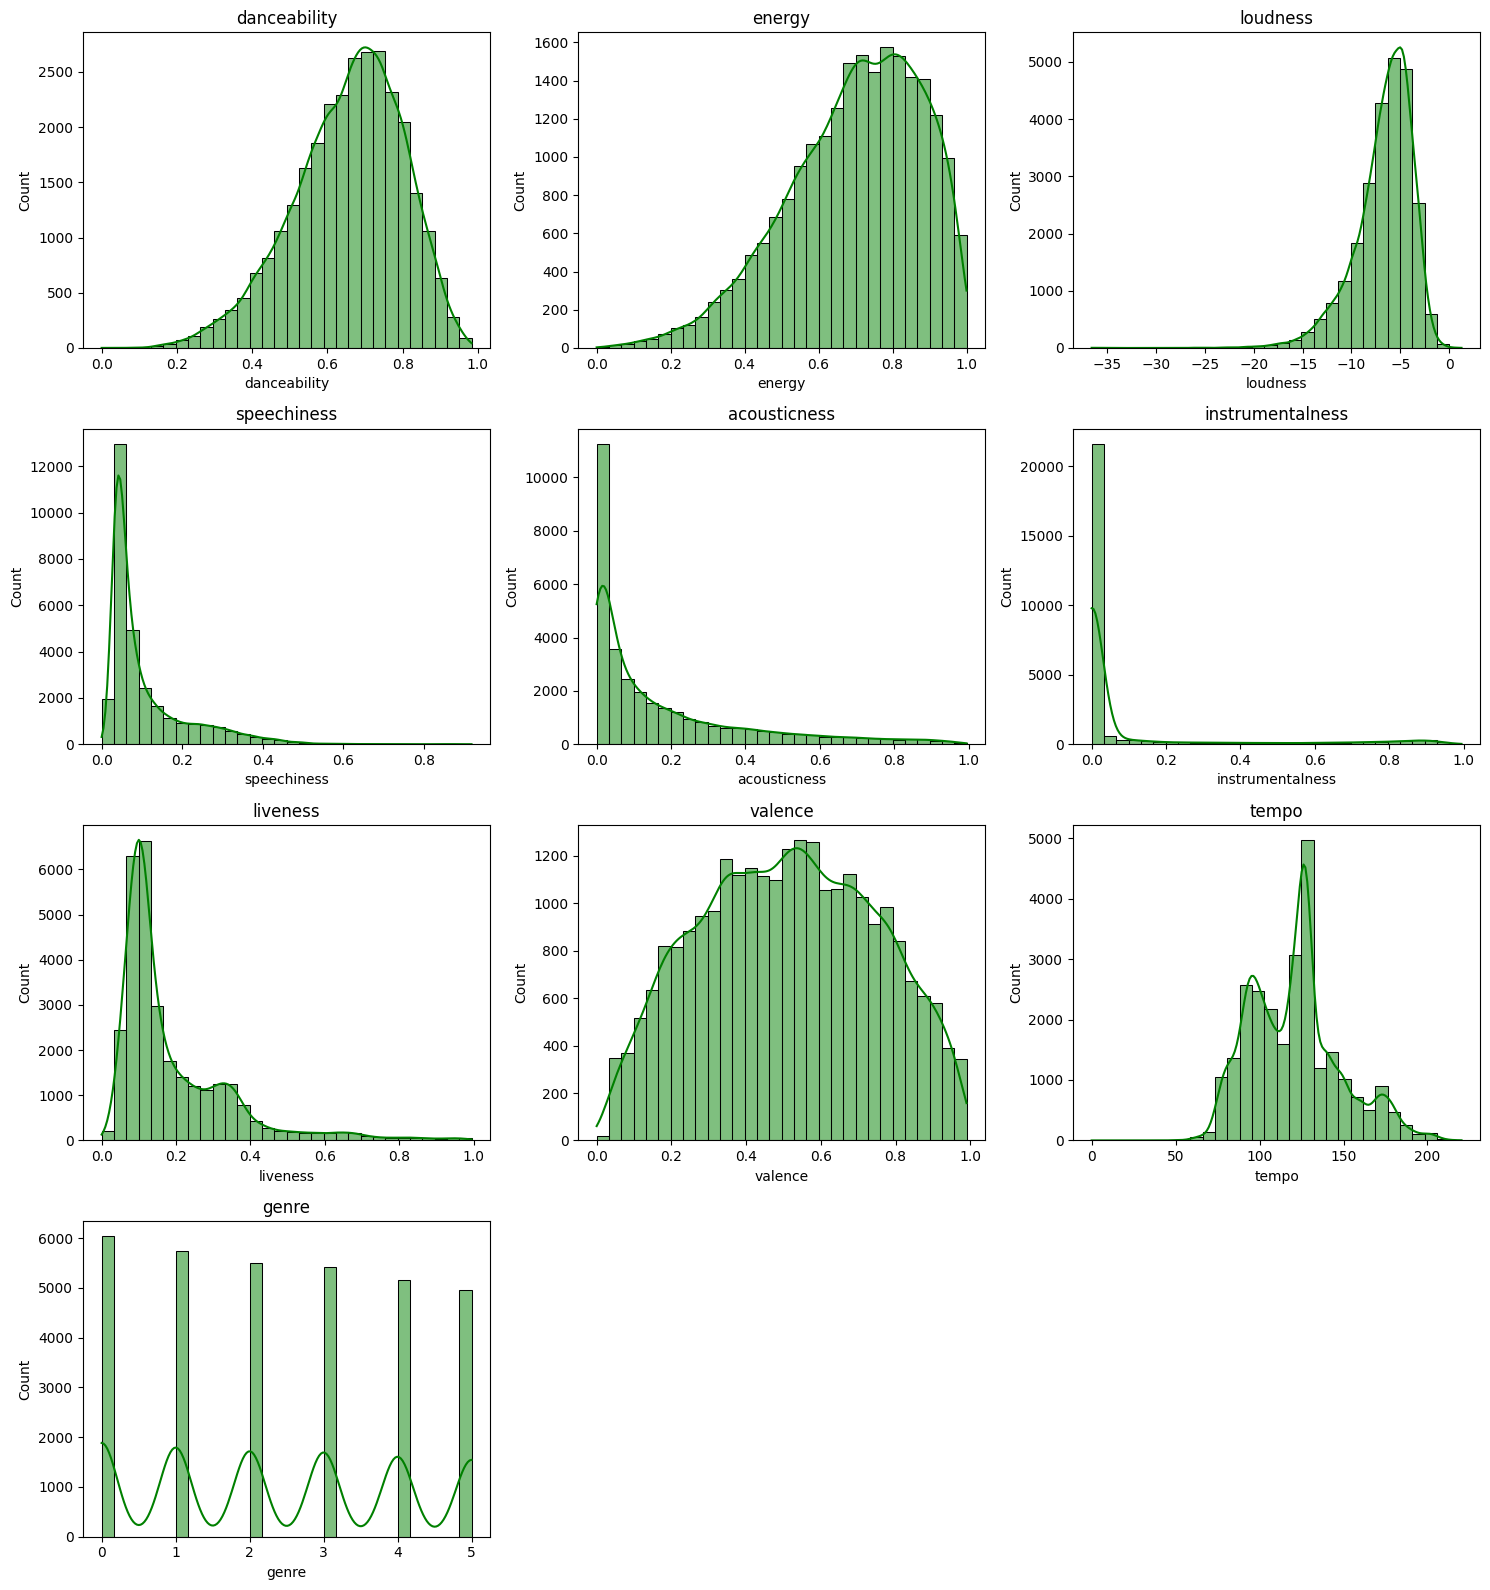

In [ ]:
num_cols = df.select_dtypes(include="number").columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], bins=30, kde=True, color="green", edgecolor="black")
    plt.title(column)

plt.tight_layout()
plt.show()

This plot shows the distribution of the features

*   liveness is right-skewed that means most songs are not very liveness, as well as speechines, acousticness and instrumentalness
*   loudness is left-skewed, it means most tracks are highly loudness, as well as danceability



In [ ]:
sns.pairplot(df, plot_kws={"color": "green"}, diag_kws={'color': 'green'})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

This visualisation shows relationships between multiple numerical variables. It can be concluded that there is a linear relationship between loudness and energy. There is non-linearity between other features.


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
danceability,3662
energy,11261
loudness,7620
speechiness,2361
acousticness,894
instrumentalness,6470
liveness,2986
valence,7489
tempo,6557
genre,0


In [ ]:
missing_values_percentage = 100 * missing_values_count / len(df)
missing_values_percentage

,0
danceability,11.153413
energy,34.297810
loudness,23.208357
speechiness,7.190936
acousticness,2.722870
instrumentalness,19.705784
liveness,9.094509
valence,22.809369
tempo,19.970761
genre,0.000000


In [ ]:
missing = pd.concat([missing_values_count, missing_values_percentage], axis=1)
missing.columns = ['count of missing values', '% of missing values']
missing


,count of missing values,% of missing values
danceability,3662,11.153413
energy,11261,34.297810
loudness,7620,23.208357
speechiness,2361,7.190936
acousticness,894,2.722870
instrumentalness,6470,19.705784
liveness,2986,9.094509
valence,7489,22.809369
tempo,6557,19.970761
genre,0,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

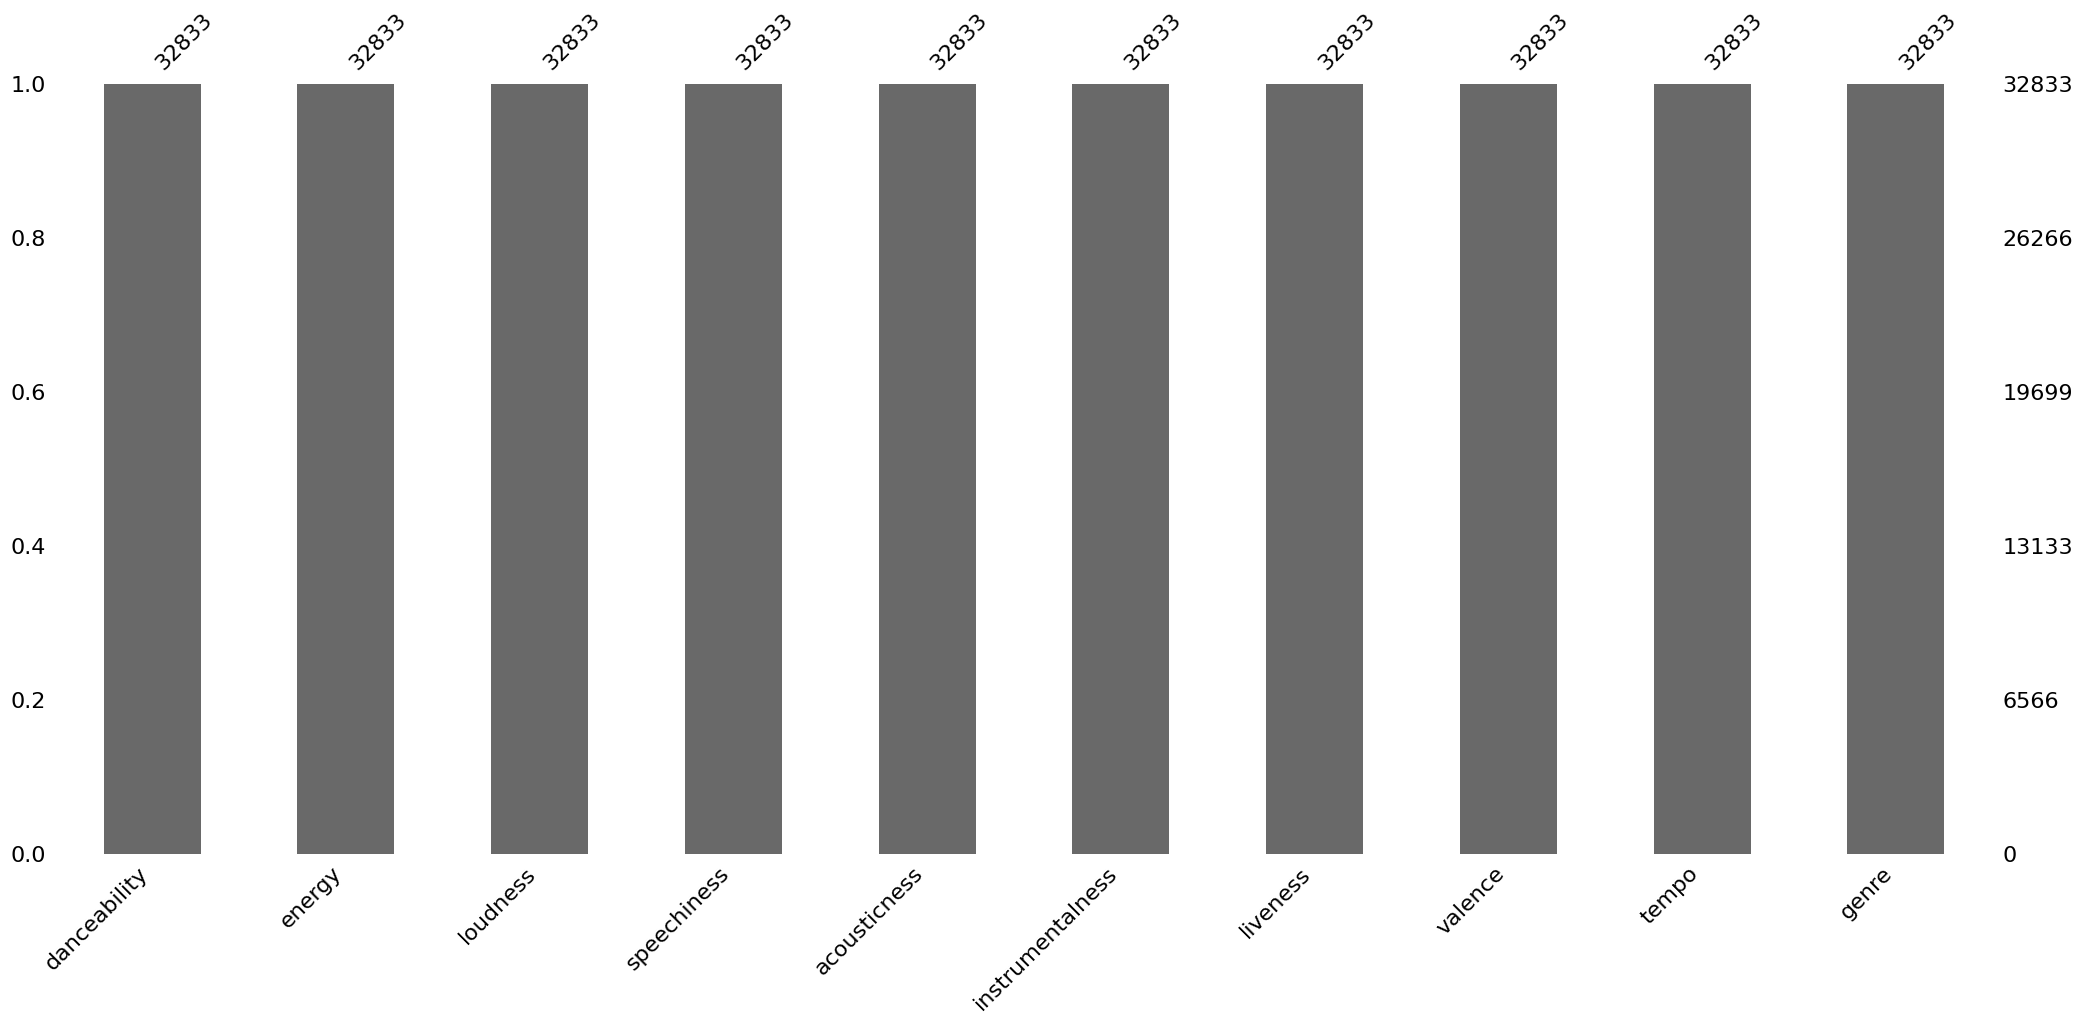

In [ ]:
msno.bar(df)


<Axes: >

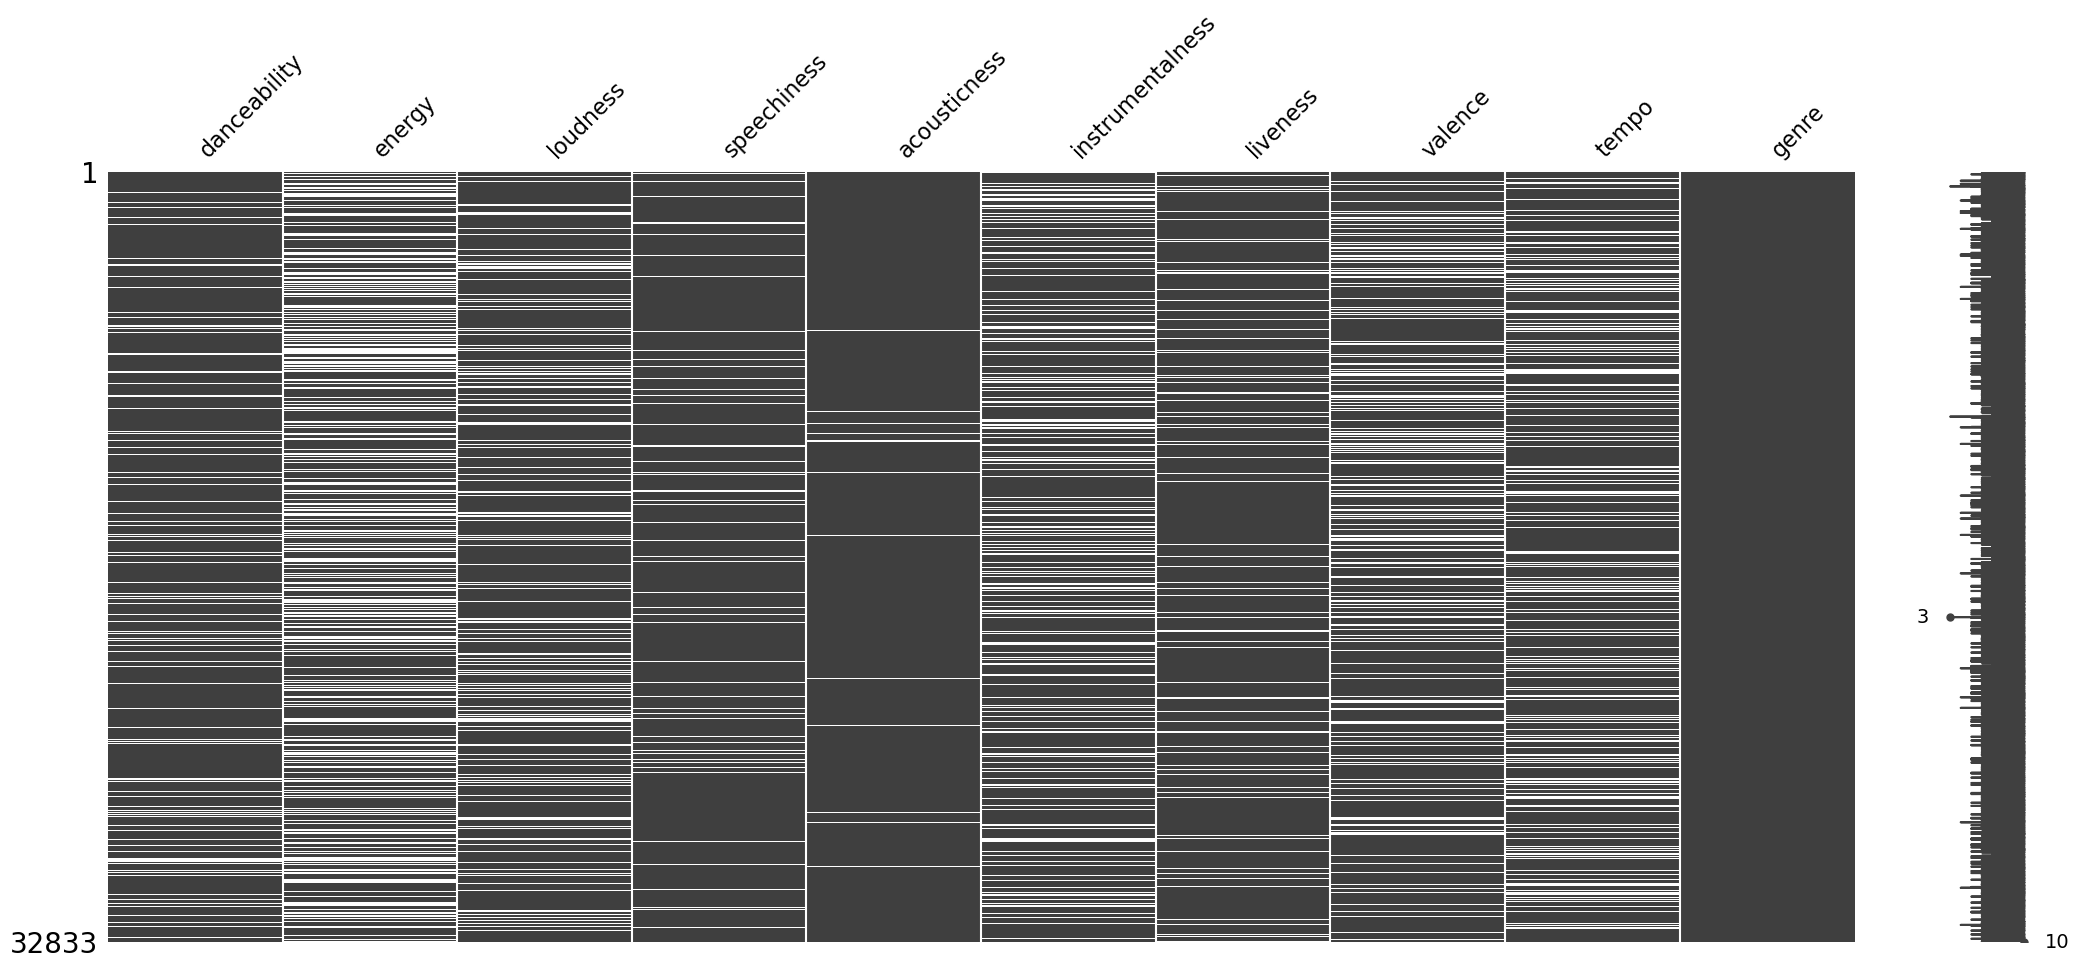

In [ ]:
msno.matrix(df)


<Axes: >

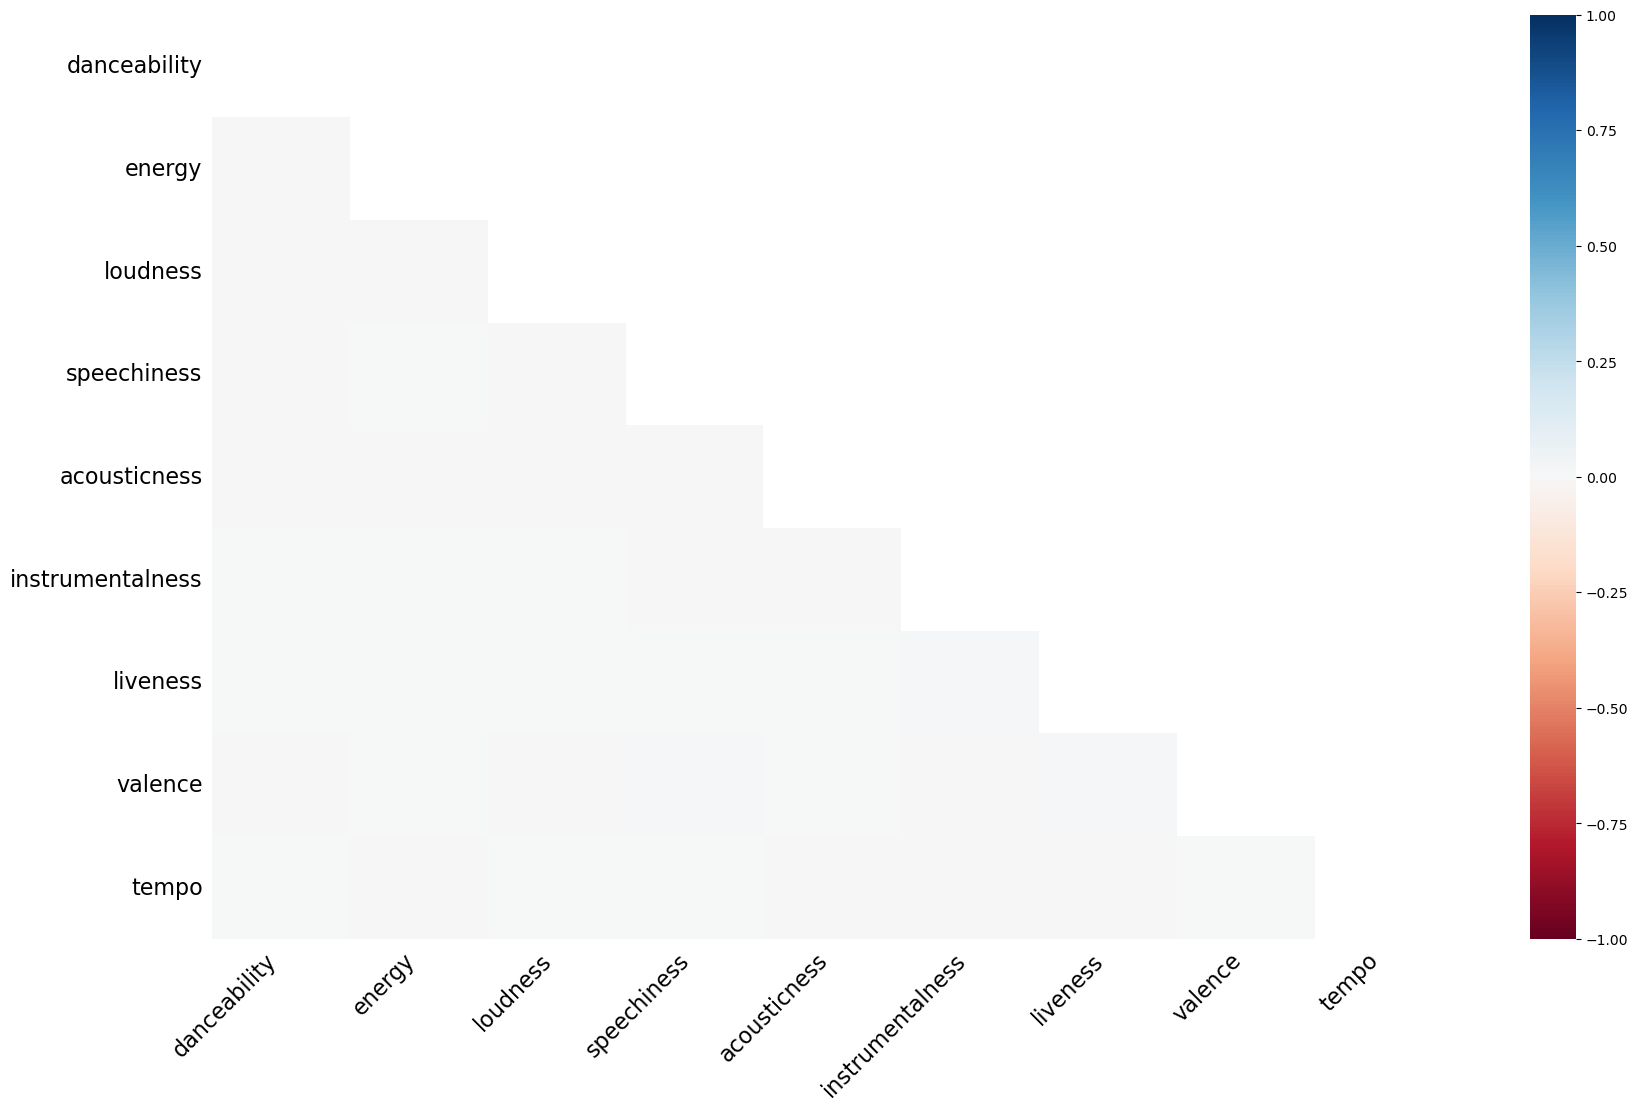

In [ ]:
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations (msno bar and msno matrix).

In [ ]:
missing_values_count

,0
danceability,3662
energy,11261
loudness,7620
speechiness,2361
acousticness,894
instrumentalness,6470
liveness,2986
valence,7489
tempo,6557
genre,0


In [ ]:
df['genre'].mean()
df.dropna(subset=['genre'], how='any', inplace=True)
df.isnull().sum()

,0
danceability,3662
energy,11261
loudness,7620
speechiness,2361
acousticness,894
instrumentalness,6470
liveness,2986
valence,7489
tempo,6557
genre,0


In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
df['danceability'] = imputer.fit_transform(df[['danceability']])
df['energy'] = imputer.fit_transform(df[['energy']])
df['loudness'] = imputer.fit_transform(df[['loudness']])
df['speechiness'] = imputer.fit_transform(df[['speechiness']])
df['acousticness'] = imputer.fit_transform(df[['acousticness']])
df['instrumentalness'] = imputer.fit_transform(df[['instrumentalness']])
df['liveness'] = imputer.fit_transform(df[['liveness']])
df['valence'] = imputer.fit_transform(df[['valence']])
df['tempo'] = imputer.fit_transform(df[['tempo']])

df.isnull().sum()

,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0
tempo,0
genre,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
X,Y=df.drop(columns=['genre']),df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearset Neighbors Classification

Creating an instance of the KNN Classification model and train it using the `fit` function.

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([0, 5, 2, ..., 3, 5, 0])

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.62      0.46      1227
           1       0.40      0.48      0.44      1141
           2       0.24      0.23      0.23      1143
           3       0.32      0.22      0.26      1056
           4       0.35      0.21      0.26      1042
           5       0.48      0.34      0.40       958

    accuracy                           0.36      6567
   macro avg       0.36      0.35      0.34      6567
weighted avg       0.36      0.36      0.34      6567



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.35678391959798994


##SelectKBest
selecting the top 𝑘 features based on their scores

In [ ]:
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, Y)

feature_scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)

print(feature_scores)

            Feature        Score
3       speechiness  1391.701971
5  instrumentalness   465.086045
4      acousticness   440.601359
0      danceability   383.491587
2          loudness   196.805569
7           valence   169.119831
1            energy    88.977254
6          liveness    44.450823
8             tempo    24.695929


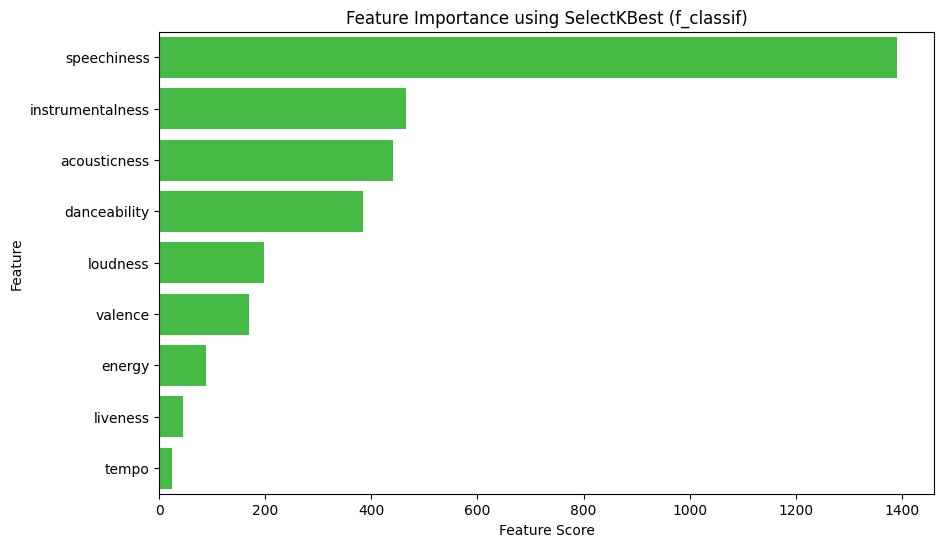

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_scores["Score"],
    y=feature_scores["Feature"],
    color="limegreen"
)

plt.xlabel("Feature Score")
plt.ylabel("Feature")
plt.title("Feature Importance using SelectKBest (f_classif)")
plt.show()

In [ ]:
df_copy = df.drop(columns=["energy", "tempo", "liveness","valence"])

In [ ]:
X,Y=df_copy.drop(columns=['genre']),df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([1, 0, 3, ..., 1, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.52      0.40      1235
           1       0.37      0.46      0.41      1179
           2       0.23      0.23      0.23      1073
           3       0.29      0.20      0.24      1080
           4       0.29      0.16      0.21      1023
           5       0.48      0.38      0.43       977

    accuracy                           0.33      6567
   macro avg       0.33      0.32      0.32      6567
weighted avg       0.33      0.33      0.32      6567



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.3316582914572864


With removed features, the accuracy is even worse than before.

# Fine-tuning the K-Nearset Neighbors Hyperparameter

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [ ]:
optimal_k = 0
highest_accuracy = 0
accuracy_scores = []
neighbor_values = []

for neighbors in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(X_train, Y_train)
    predictions = knn_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, predictions)
    neighbor_values.append(neighbors)
    accuracy_scores.append(accuracy)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        optimal_k = neighbors


## Final Assessment of the Model Performance
Evaluation of model's performance on a test set for final assessment.

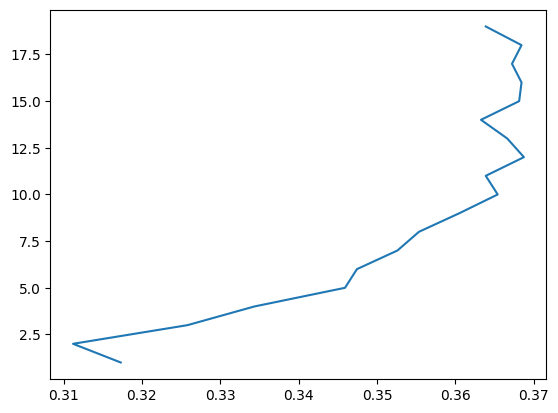

In [ ]:
plt.plot(accuracy_scores, neighbor_values)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.44      0.52      0.48       600
           1       0.41      0.47      0.44       586
           2       0.25      0.22      0.23       554
           3       0.31      0.27      0.29       567
           4       0.28      0.23      0.25       506
           5       0.45      0.50      0.48       471

    accuracy                           0.37      3284
   macro avg       0.36      0.37      0.36      3284
weighted avg       0.36      0.37      0.36      3284



In [ ]:
print(confusion_matrix(Y_test,y_pred))

[[314  54  71  41  49  71]
 [ 62 273  60  80  76  35]
 [124  67 121  80  72  90]
 [ 71 135  76 152  79  54]
 [ 71 116  89  81 114  35]
 [ 66  16  67  64  21 237]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.3687576126674787
